In [11]:
import tensorflow as tf
from keras import layers, models

Using TensorFlow backend.


In [2]:
imdb = tf.keras.datasets.imdb
# keep the top 10,000 most frequently occurring words in the training data
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=1000)

In [3]:
# Decode sequence of indexes back to reviews

word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in x_train[0]])

In [4]:
decoded_review

"? this film was just brilliant casting ? ? story direction ? really ? the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same ? ? as myself so i loved the fact there was a real ? with this film the ? ? throughout the film were great it was just brilliant so much that i ? the film as soon as it was released for ? and would recommend it to everyone to watch and the ? ? was amazing really ? at the end it was so sad and you know what they say if you ? at a film it must have been good and this definitely was also ? to the two little ? that played the ? of ? and paul they were just brilliant children are often left out of the ? ? i think because the stars that play them all ? up are such a big ? for the whole film but these children are amazing and should be ? for what they have done don't you think the whole story was so ? because it was true and was ? life after all that was ? with us all"

In [5]:
# Encoding the integer sequences into a binary matrix

import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(x_train)
x_test = vectorize_sequences(x_test)

In [6]:
y_train

array([1, 0, 0, ..., 0, 1, 0])

In [7]:
y_train = np.asarray(y_train).astype('float32')
y_test = np.asarray(y_test).astype('float32')

In [8]:
y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

In [12]:
# Model

# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Dense(16, activation='relu', input_shape=(10000,)))
# model.add(tf.keras.layers.Dense(16, activation='relu'))
# model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [13]:
history = model.fit(x_train,
                    y_train,
                    epochs=20,
                    batch_size=512,
                    validation_split=0.20)

Train on 20000 samples, validate on 5000 samples
Epoch 1/20
20000/20000 [==============================] - 7s 341us/step - loss: 0.6627 - acc: 0.5910 - val_loss: 0.5847 - val_acc: 0.8124
Epoch 2/20
20000/20000 [==============================] - 5s 229us/step - loss: 0.5638 - acc: 0.7354 - val_loss: 0.4734 - val_acc: 0.8434
Epoch 3/20
20000/20000 [==============================] - 4s 216us/step - loss: 0.4904 - acc: 0.7964 - val_loss: 0.4129 - val_acc: 0.8524
Epoch 4/20
20000/20000 [==============================] - 4s 223us/step - loss: 0.4485 - acc: 0.8288 - val_loss: 0.3796 - val_acc: 0.8566
Epoch 5/20
20000/20000 [==============================] - 3s 154us/step - loss: 0.4185 - acc: 0.8438 - val_loss: 0.3580 - val_acc: 0.8604
Epoch 6/20
20000/20000 [==============================] - 3s 142us/step - loss: 0.3972 - acc: 0.8525 - val_loss: 0.3467 - val_acc: 0.8624
Epoch 7/20
20000/20000 [==============================] - 4s 187us/step - loss: 0.3834 - acc: 0.8587 - val_loss: 0.3371 - v

In [14]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

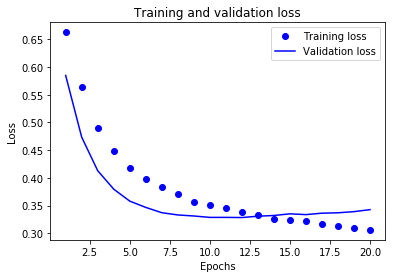

In [16]:
import matplotlib.pyplot as plt

loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

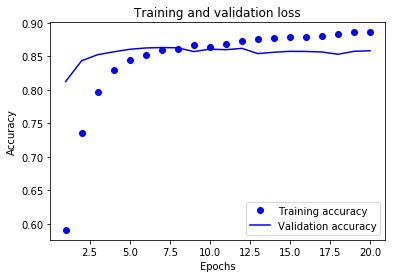

In [17]:
acc = history_dict['acc']
val_acc = history_dict['val_acc']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [34]:
results = model.evaluate(x_test, y_test)

25000/25000 [==============================] - 5s 203us/step


In [35]:
results

[0.3335278328704834, 0.8566]